## Pyber study - the relationship between:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

## Trend Observations:
* Based on "Bubble Plot of Ride Sharing Data" analysis -- Urban Pyber drivers have far more drivers per city than Suburban and Rural, and also have the lowest fare cost per ride
* Based on "Total Drivers by City Type" and "Total Fares by City Type" analyses -- While Urban Pyber drivers make up 80.9% of all Pyber drivers, they only make up 62.7% of total fares, due to having the lowest average fare price of the three city types. On the contrary, the Rural Pyber drivers only make up 2.6% of total drivers, but are collecting 6.8% of the total fares and the same is true for Suburban Pyber drivers, having 16.5% of drivers and collecting 30.5% of total fares
* Based on "Total Drivers by City Type" and "Total Rides by City Type" analyses -- Urban drivers also see fewer riders per driver than Suburban and Rural drivers. Again while, Urban, Suburban, and Rural make up 80.9%, 16.5% and 2.6% of the total drivers, respectively, Urban drivers make up only 68.4% of total rides (Suburban and Rural are 26.3% and 5.3% respectively)

In [108]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine data into single table by starting w/ ride_data and add city_data cols driver_count and type using city 
city_ride_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

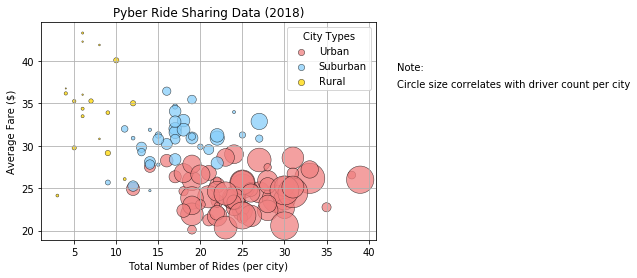

In [109]:
# Data for 3 overlaying scatter plots grouped by type, then city, then need x-axis = number of rides, 
# y-axis = average fare and size of bubbles = driver count.
# Divide circle size by 2.5, to shrink for better presentation

# Urban data points for plotting
urban_city_ride_data = city_ride_data.query('type == "Urban"')
urban_num_rides = urban_city_ride_data.groupby("city").city.count()
urban_avg_fare = urban_city_ride_data.groupby("city").fare.mean()
urban_driver_count = urban_city_ride_data.groupby("city").driver_count.sum()/2.5

# Suburban data points for plotting
suburban_city_ride_data = city_ride_data.query('type == "Suburban"')
suburban_num_rides = suburban_city_ride_data.groupby("city").city.count()
suburban_avg_fare = suburban_city_ride_data.groupby("city").fare.mean()
suburban_driver_count = suburban_city_ride_data.groupby("city").driver_count.sum()/2.5

# Rural data points for plotting
rural_city_ride_data = city_ride_data.query('type == "Rural"')
rural_num_rides = rural_city_ride_data.groupby("city").city.count()
rural_avg_fare = rural_city_ride_data.groupby("city").fare.mean()
rural_driver_count = rural_city_ride_data.groupby("city").driver_count.sum()/2.5

# Scatter plot mapping code
plt.scatter(urban_num_rides, urban_avg_fare, marker="o", facecolors="lightcoral", edgecolors="black", 
            s=urban_driver_count, alpha = .75, linewidths = .5)
plt.scatter(suburban_num_rides, suburban_avg_fare, marker="o", facecolors="lightskyblue", edgecolors="black", 
            s=suburban_driver_count, alpha = .75, linewidths = .5)
plt.scatter(rural_num_rides, rural_avg_fare, marker="o", facecolors="gold", edgecolors="black", 
            s=rural_driver_count, alpha = .75, linewidths = .5)

# Add title and axis labels
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")

# Add note about circle size; use x and y axis data points to help with placement of text
text_for_scatter_1 = "Note:"
text_for_scatter_2 = "Circle size correlates with driver count per city"

text_placement_x = max(urban_avg_fare.max(),suburban_avg_fare.max(),rural_avg_fare.max()) +.1
text_placement_y = max(urban_num_rides.max(),suburban_num_rides.max(),rural_num_rides.max()) - .1

plt.text(text_placement_x,text_placement_y,text_for_scatter_1)
plt.text(text_placement_x,text_placement_y - 2,text_for_scatter_2)

# Add grid lines and legend (loc 0 for best fit, 1 for upper right, used 0)
plt.grid(which='major', axis='both')

# Add legend and fix so bubbles are same size
# For list of labels
types = city_ride_data.type.unique()
# Legend
lgnd = plt.legend(loc=0, scatterpoints=1, title = "City Types", labels = types)
for handle in lgnd.legendHandles:
    handle.set_sizes([40.0])

# Show plot for all 3
plt.show()
    




## Total Fares by City Type

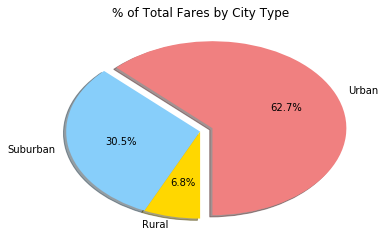

In [110]:
# Create pie chart using total fares for each city
# Sum total fares for each type and create list
urban_fare_total = urban_city_ride_data.fare.sum()
suburban_fare_total = suburban_city_ride_data.fare.sum()
rural_fare_total = rural_city_ride_data.fare.sum()

fare_pie = [urban_fare_total,suburban_fare_total,rural_fare_total]

# List for pie chart explode parameters; will be used for all pie charts
explode = (0.1, 0, 0)

# List of colors for pie chart; will be used for all pie charts
colors = ["lightcoral","lightskyblue","gold"]

# Build Pie Chart; borrowed label types from above code
plt.pie(fare_pie, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

# Add title
plt.title("% of Total Fares by City Type")

# Save Figure
plt.show()

## Total Rides by City Type

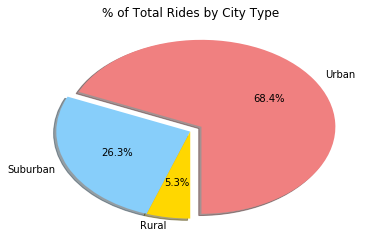

In [111]:
# Create pie chart using Ride Percents by type
# Use length of each table, since rows are one per ride, to create list
rides_pie = [len(urban_city_ride_data),len(suburban_city_ride_data),len(rural_city_ride_data)]

# Build Pie Chart; borrowed label types, explode and colors from above
plt.pie(rides_pie, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

# Add title
plt.title("% of Total Rides by City Type")

# Save Figure
plt.show()


## Total Drivers by City Type

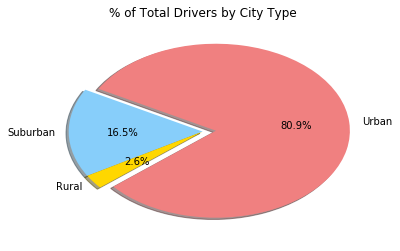

In [112]:
# Calculate Driver Percents
# Sum driver_count from original table city_data; do in 3 lines instead of group by list
# to keep order of city types consistent with above charts
urban_drivers = city_data.query('type == "Urban"').driver_count.sum()
suburban_drivers = city_data.query('type == "Suburban"').driver_count.sum()
rural_drivers = city_data.query('type == "Rural"').driver_count.sum()
driver_pie = [urban_drivers,suburban_drivers,rural_drivers]

# Build Pie Chart; borrowed label types, explode and colors from above
plt.pie(driver_pie, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)

# Add title
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.show()
